In [20]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
api_key='Youtube_API_ID'
channel_ids=['UCj22tfcQrWG7EMEKS0qLeEg',#carry 
            'UC7eHZXheF8nVOfwB2PEslMw',#ashish
            'UCqwUrj10mAEsqezcItqvwEw',#bb ki vine 
            'UC5c9VlYTSvBSCaoMu_GI6gQ',#total gaming 
            'UC_vcKmg67vjMP7ciLnSxSHQ',#amit bhadana
            'UCt4atlExw8aj3Bm79nv1fig'#round2hell
           ]

youtube= build('youtube','v3',developerKey=api_key)

## Function to get channel statistics

In [21]:
def get_channel_stats(youtube,channel_ids):
       all_data=[]
       request = youtube.channels().list(
          part="snippet,contentDetails,statistics",
          id=','.join(channel_ids))
       response = request.execute()
    
       for i in range(len(response['items'])):
           data = dict (channel_name = response['items'][i]['snippet']['title'],
                  subscribers=response['items'][i]['statistics']['subscriberCount'],
                  views =response['items'][i]['statistics']['viewCount'],
                  videos =response['items'][i]['statistics']['videoCount'],
                  playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
           all_data.append(data)
    
       return all_data
    

In [22]:
channel_statistics = get_channel_stats(youtube,channel_ids)

In [23]:
channel_data= pd.DataFrame(channel_statistics)

In [24]:
channel_data

,channel_name,subscribers,views,videos,playlist_id
0,CarryMinati,40400000,3460046355,189,UUj22tfcQrWG7EMEKS0qLeEg
1,Round2hell,31200000,3204863050,67,UUt4atlExw8aj3Bm79nv1fig
2,ashish chanchlani vines,29900000,4524459116,151,UU7eHZXheF8nVOfwB2PEslMw
3,BB Ki Vines,26300000,4803097129,190,UUqwUrj10mAEsqezcItqvwEw
4,Total Gaming,36400000,5740103068,1230,UU5c9VlYTSvBSCaoMu_GI6gQ
5,Amit Bhadana,24300000,2393872889,101,UU_vcKmg67vjMP7ciLnSxSHQ


In [29]:
channel_data.index = channel_data.index +1

In [30]:
channel_data

,channel_name,subscribers,views,videos,playlist_id
1,CarryMinati,40400000,3460046355,189,UUj22tfcQrWG7EMEKS0qLeEg
2,Round2hell,31200000,3204863050,67,UUt4atlExw8aj3Bm79nv1fig
3,ashish chanchlani vines,29900000,4524459116,151,UU7eHZXheF8nVOfwB2PEslMw
4,BB Ki Vines,26300000,4803097129,190,UUqwUrj10mAEsqezcItqvwEw
5,Total Gaming,36400000,5740103068,1230,UU5c9VlYTSvBSCaoMu_GI6gQ
6,Amit Bhadana,24300000,2393872889,101,UU_vcKmg67vjMP7ciLnSxSHQ


In [31]:
channel_data.describe()

,channel_name,subscribers,views,videos,playlist_id
count,6,6,6,6,6
unique,6,6,6,6,6
top,CarryMinati,40400000,3460046355,189,UUj22tfcQrWG7EMEKS0qLeEg
freq,1,1,1,1,1


In [32]:
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 1 to 6
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_name  6 non-null      object
 1   subscribers   6 non-null      object
 2   views         6 non-null      object
 3   videos        6 non-null      object
 4   playlist_id   6 non-null      object
dtypes: object(5)
memory usage: 372.0+ bytes


In [33]:
channel_data.dtypes

channel_name    object
subscribers     object
views           object
videos          object
playlist_id     object
dtype: object

In [34]:

channel_data['videos'] = pd.to_numeric(channel_data['videos'])


In [35]:
channel_data['views'] = pd.to_numeric(channel_data['views'])


In [36]:
channel_data['subscribers']=pd.to_numeric(channel_data['subscribers'])

In [37]:
channel_data.dtypes

channel_name    object
subscribers      int64
views            int64
videos           int64
playlist_id     object
dtype: object

## Visualization of 6 top youtuber Data

Text(0.5, 1.0, 'Number of Subscribers')

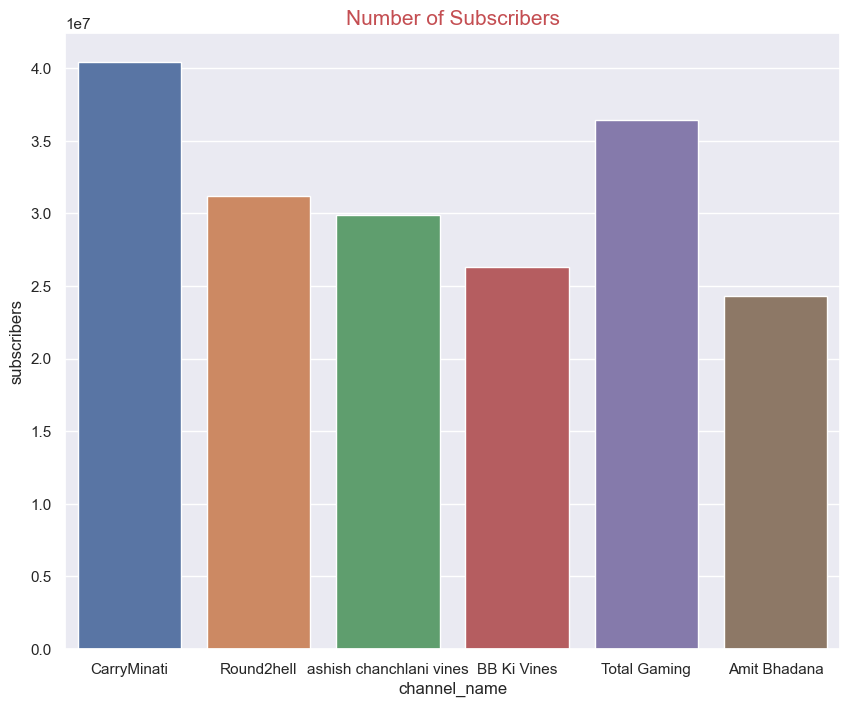

In [162]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x='channel_name',y='subscribers',data=channel_data)
plt.title("Number of Subscribers",color='r',fontsize='15')

Text(0.5, 1.0, 'Total number of view ')

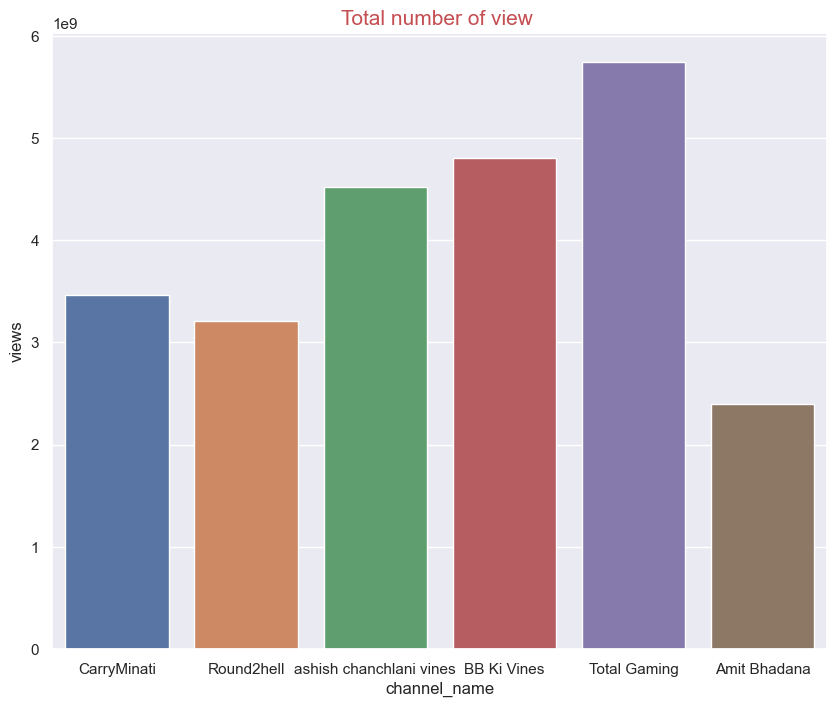

In [161]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x='channel_name',y='views',data=channel_data)
plt.title("Total number of view ",color='r',fontsize='15')


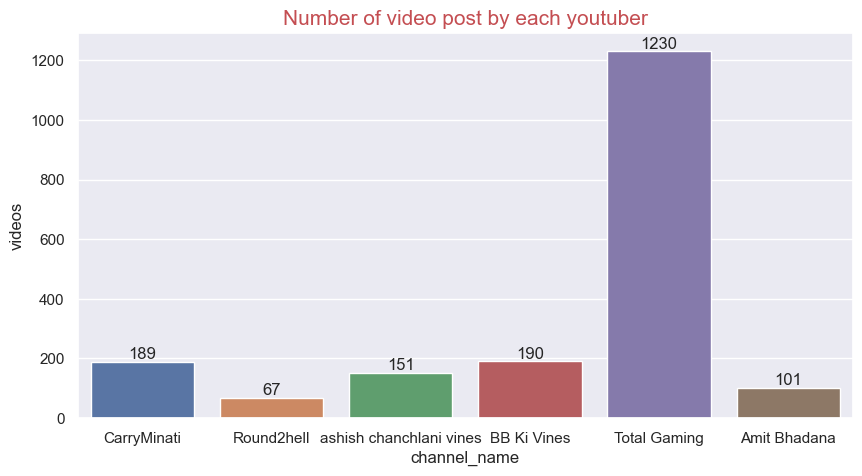

In [160]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.barplot(x='channel_name',y='videos',data=channel_data)
plt.title("Number of video post by each youtuber",color='r',fontsize='15')

for i in ax.containers:
    ax.bar_label(i,)

## Function to get vedio id

In [67]:
# playlist_id = channel_data.loc[channel_data['channel_name']== 'Total gaming','playlist_id']
playlist_id = 'UUj22tfcQrWG7EMEKS0qLeEg'#carryminati playlist id UUj22tfcQrWG7EMEKS0qLeEg

In [68]:
playlist_id

'UUj22tfcQrWG7EMEKS0qLeEg'

In [69]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId = playlist_id,
        maxResults =50)
    
    response = request.execute()
    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token= response.get('nextPageToken')    
    more_pages= True
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
              request = youtube.playlistItems().list(
                  part='contentDetails',
                  playlistId = playlist_id,
                  maxResults =50,
                  pageToken= next_page_token)
              response = request.execute()
              for i in range(len(response['items'])):
                   video_ids.append(response['items'][i]['contentDetails']['videoId'])
              next_page_token = response.get('nextPageToken')
    
    return video_ids

In [70]:
video_ids = get_video_ids(youtube, playlist_id)

In [71]:
video_ids

['9VdFCP6nC-g',
 'P6EfPeYnf0c',
 'VH4WN7wdQMk',
 '5XVoRGhrhZk',
 'KQWjB9tvRWg',
 'iFtH6g5HEVM',
 'D6HAgkLImUQ',
 'IoTL9xZOdP0',
 'KlLxJ1FrOlI',
 'pmj9gF7H_lQ',
 'l6BChpns5w8',
 '-LIMVVfRp6Q',
 'G6qLfTA2PFw',
 '0jUj3rfO7eM',
 'xLjMzNKUXKs',
 'Q9eh308Mstc',
 'ZAvKl1RRVh8',
 'd7sewLjzNs0',
 '7mFvyrNHZRY',
 'W2uUlW8PLOY',
 'abhuAYtmk58',
 'q2QvA3wwAe0',
 'zzwRbKI2pn4',
 'WUdo9lzpaas',
 'YXlRTFhfE_4',
 'WNWZNyXSvW0',
 'GOFQN8otiYs',
 'WcjMwfwfojQ',
 '9DAKh_XCk6g',
 '0Cyvhz1GmRI',
 'ARKlB5Roq14',
 'SE7Yx_b0bE8',
 'zIysUw3B3Gs',
 '7x9OmRGtF4E',
 'bHLJjgzCDzU',
 'U8qEsK3liMI',
 'uyFxLg_LYU0',
 '0MpVfUK9uho',
 'pJZTizXITW0',
 '_575JFx6Iq4',
 '4DOHUzTdS_8',
 '2QBsDH72MoM',
 'XvyKSWfxM_w',
 'n2VL8tGZSsA',
 '10y9yefd_xY',
 '1x2K9Rie2Vg',
 '6LjPVsA_INg',
 'wrmEZFSeOJo',
 'qAt4__lG0es',
 'fUTyUjYldqg',
 'nCNXaH67B-w',
 'Hm32viIpFqk',
 'iP-wzsu8pKw',
 'rqNHHY1Ni_c',
 'L1AuR4NORTk',
 'x4gQHzfLKsg',
 'j8LTjzih2sQ',
 '2xrcas1YDkU',
 'vWI6cixIDsg',
 '2ygclkWHo8w',
 'X5_Pj-ooYgA',
 'uASM7aFcQJ8',
 'lZC45n

In [111]:
def get_video_details(youtube, video_ids):
    all_video_stats= []
    for i in range(0, len(video_ids),50):
        
       request=youtube.videos().list(
         part='snippet,statistics',
         id=','.join(video_ids[i:i+50]))
       
       response=request.execute()
       for video in response['items']:
         video_stats= dict(Title=video['snippet']['title'],
                         published_date= video['snippet']['publishedAt'],
                         Views=video['statistics'].get('viewCount',0),
                         Likes=video['statistics'].get('likeCount',0),
                         Comments=video['statistics'].get('commentCount',0))
                        
         all_video_stats.append(video_stats)
           
           
    return all_video_stats

In [115]:
video_details=get_video_details(youtube,video_ids)

## Load the data into dataframe

In [116]:
video_data=pd.DataFrame(video_details)

In [117]:
video_data

,Title,published_date,Views,Likes,Comments
0,BIGG BOSS OR YOUTUBE? The Final Verdict | CARR...,2023-09-16T06:59:54Z,15474054,2631092,60840
1,JALWA - CARRYMINATI X WILY FRENZY,2023-08-11T07:06:01Z,12018390,1759516,105266
2,"JALWA releasing on Friday, 11th August 2023. #...",2023-08-09T09:46:20Z,1739541,240627,2909
3,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,2023-07-15T06:58:55Z,57589400,4876844,203651
4,"Toh guys, naya vlog aane vaala hai taiyaar reh...",2023-07-13T10:09:52Z,19557803,1039073,7590
...,...,...,...,...,...
183,India's Adult Film of The Year !,2016-02-17T13:33:57Z,12172940,376906,6927
184,KRK India's Best Film ACTOR/PRODUCER/CRITIC !,2016-02-14T13:58:58Z,6055255,398224,7262
185,Indians That Torrent,2016-02-09T14:02:52Z,3184297,190885,4286
186,INDIA CS:GO,2016-02-06T14:09:08Z,3601999,197173,5655


In [178]:
video_data['published_date']= pd.to_datetime(video_data['published_date'])

In [172]:
video_data['Views']= pd.to_numeric(video_data['Views'])
video_data['Likes']= pd.to_numeric(video_data['Likes'])
video_data['Comments']= pd.to_numeric(video_data['Comments'])

In [179]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           188 non-null    object        
 1   published_date  188 non-null    datetime64[ns]
 2   Views           188 non-null    int64         
 3   Likes           188 non-null    int64         
 4   Comments        188 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.5+ KB


In [180]:
 top10_videos= video_data.sort_values(by='Views',ascending= False).head(10)

In [181]:
top10_videos

,Title,published_date,Views,Likes,Comments
22,YALGAAR - CARRYMINATI X Wily Frenzy,2020-06-05,352099451,18483938,1717074
24,STOP MAKING ASSUMPTIONS | YOUTUBE VS TIK TOK: ...,2020-05-17,79305453,9203552,825777
36,TIKTOK EVOLUTION 2019 | CARRYMINATI,2019-07-05,75209742,5860777,125619
28,BIG BOSS BIG BOSS BIG BOSS PART 2 | CARRYMINATI,2020-02-12,74394333,5554023,151531
18,VARDAAN - CARRYMINATI X Wily Frenzy,2021-01-17,73413128,6732060,424093
39,NO MORE SINGLE: VALENTINE SPECIAL FEAT ROCKY,2019-02-11,72914478,4507943,100390
13,THARA BHAiiiii | CARRYMINATI,2022-01-19,63108095,6965639,338256
41,Bye Pewdiepie | Carryminati,2019-01-01,61744661,3672622,346572
26,FILM THE FLARE,2020-04-10,57591406,4040537,81220
3,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,2023-07-15,57589400,4876844,203651


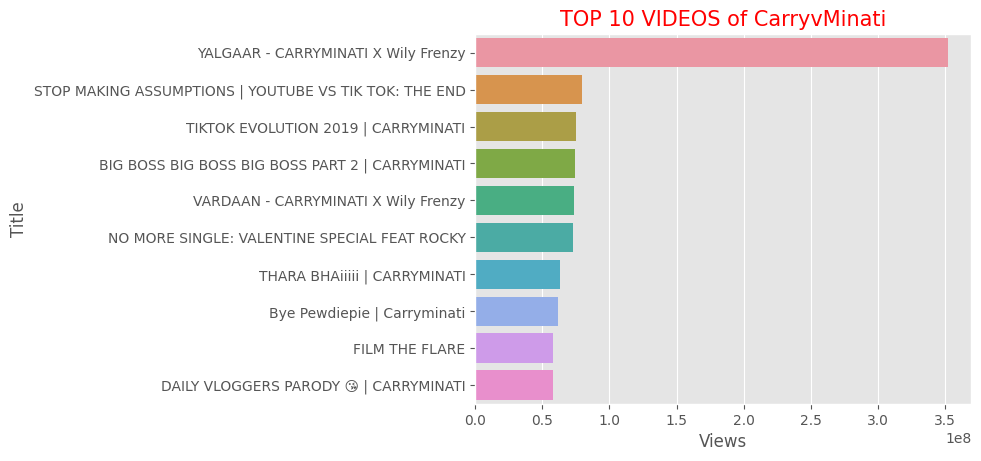

In [155]:
ax1=sns.barplot(x='Views',y='Title',data=top10_videos )
plt.title("TOP 10 VIDEOS of CarryvMinati",color='r',fontsize='15')
plt.style.use('ggplot')
plt.show()

## Visualization of data

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128536 (\N{FACE THROWING A KISS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


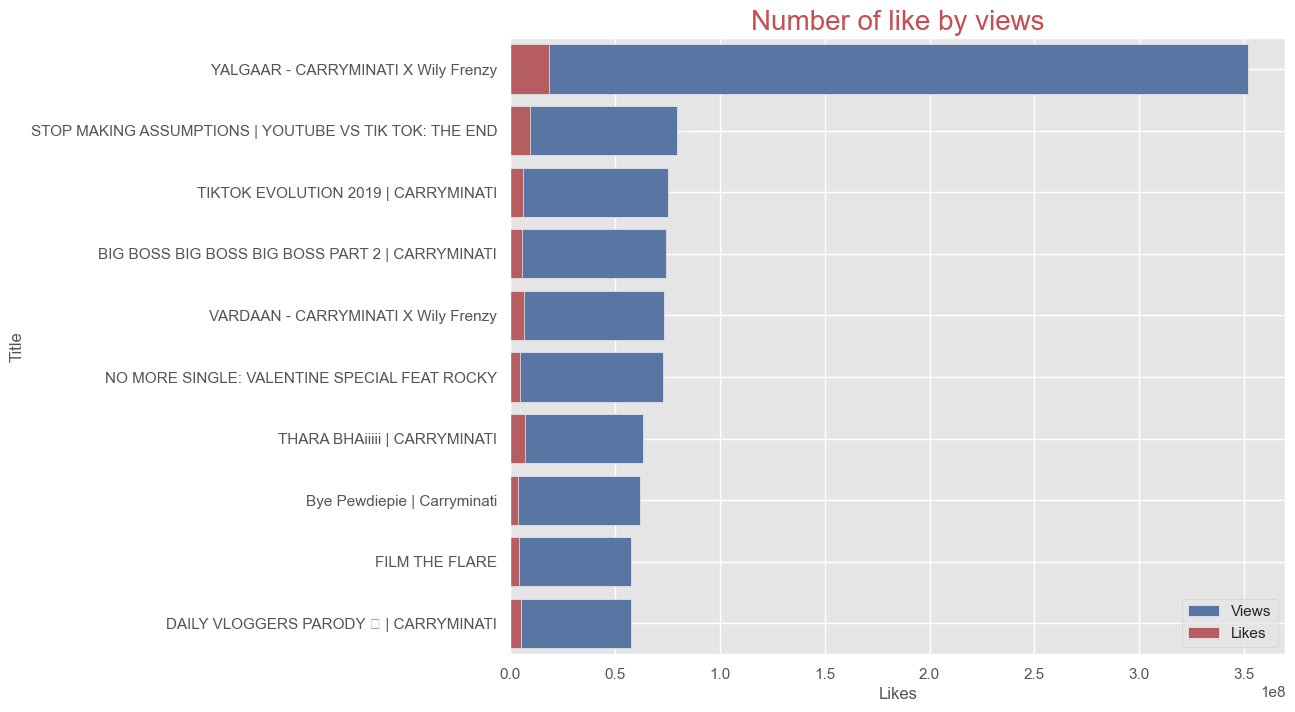

In [229]:
ax2=sns.barplot(x='Views',y='Title',data=top10_videos, color='b',label="Views" )
sns.barplot(x='Likes',y='Title',data=top10_videos,color='r',label="Likes" )
plt.title("Number of like by views",color='r',fontsize="20")
plt.legend()
plt.style.use('ggplot')
plt.grid(True)
plt.show()
